# Testing the functions of the ``christoffel`` module

In [1]:
# import some general scientific Python libraries
import numpy as np
import matplotlib.pyplot as plt

# import required PyRockWave modules
import christoffel as ch
import coordinates as c

In [2]:
# load test data
Cij = np.array([[118.8,  53.8,  53.8,   0. ,   0. ,   0. ],
                [ 53.8, 118.8,  53.8,   0. ,   0. ,   0. ],
                [ 53.8,  53.8, 118.8,   0. ,   0. ,   0. ],
                [  0. ,   0. ,   0. ,  59.4,   0. ,   0. ],
                [  0. ,   0. ,   0. ,   0. ,  59.4,   0. ],
                [  0. ,   0. ,   0. ,   0. ,   0. ,  59.4]])

density = 5.307

In [3]:
# test rearrange_tensor function
Cijkl = ch._rearrange_tensor(Cij)
Cijkl.shape

(3, 3, 3, 3)

In [4]:
Cijkl

array([[[[118.8,   0. ,   0. ],
         [  0. ,  53.8,   0. ],
         [  0. ,   0. ,  53.8]],

        [[  0. ,  59.4,   0. ],
         [ 59.4,   0. ,   0. ],
         [  0. ,   0. ,   0. ]],

        [[  0. ,   0. ,  59.4],
         [  0. ,   0. ,   0. ],
         [ 59.4,   0. ,   0. ]]],


       [[[  0. ,  59.4,   0. ],
         [ 59.4,   0. ,   0. ],
         [  0. ,   0. ,   0. ]],

        [[ 53.8,   0. ,   0. ],
         [  0. , 118.8,   0. ],
         [  0. ,   0. ,  53.8]],

        [[  0. ,   0. ,   0. ],
         [  0. ,   0. ,  59.4],
         [  0. ,  59.4,   0. ]]],


       [[[  0. ,   0. ,  59.4],
         [  0. ,   0. ,   0. ],
         [ 59.4,   0. ,   0. ]],

        [[  0. ,   0. ,   0. ],
         [  0. ,   0. ,  59.4],
         [  0. ,  59.4,   0. ]],

        [[ 53.8,   0. ,   0. ],
         [  0. ,  53.8,   0. ],
         [  0. ,   0. , 118.8]]]])

## Test function by function

### creating wavevectors

In [5]:
# create wavevectors in radians
azimuths, polar = c.equispaced_S2_grid(n=50, hemisphere='upper')
polar

array([0.        , 0.36041232, 0.41166054, 0.4574904 , 0.49940021,
       0.53831045, 0.57483455, 0.60940553, 0.64234258, 0.673889  ,
       0.70423529, 0.73353399, 0.7619095 , 0.78946486, 0.81628664,
       0.84244837, 0.86801323, 0.89303596, 0.9175644 , 0.94164069,
       0.96530219, 0.98858224, 1.01151077, 1.03411478, 1.05641876,
       1.07844503, 1.10021403, 1.12174454, 1.14305391, 1.16415821,
       1.18507239, 1.20581041, 1.22638536, 1.24680954, 1.26709457,
       1.28725142, 1.30729055, 1.32722191, 1.34705502, 1.366799  ,
       1.38646266, 1.40605447, 1.42558267, 1.44505525, 1.46448001,
       1.48386457, 1.50321644, 1.52254299, 1.54185152, 1.56114925])

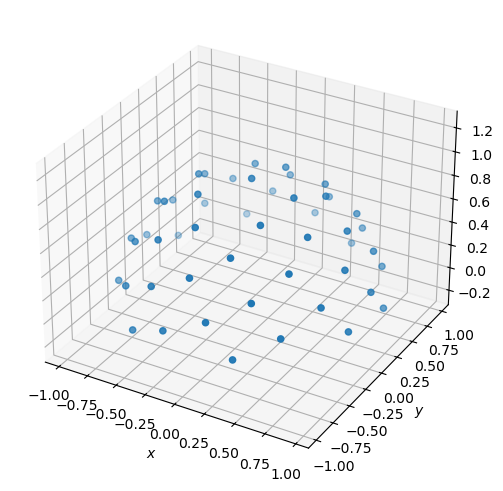

In [6]:
# convert from spherical to 3d cartesian
x, y, z = c.sph2cart(azimuths, polar)

# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
ax.scatter(x, y, z)
ax.axis('equal')
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

In [7]:
np.column_stack((x, y, z)).shape

(50, 3)

In [8]:
vectors_3d = np.column_stack((x, y, z))

# dsiplay first three wavevectors
vectors_3d[:5, :]

array([[ 0.        ,  0.        ,  1.        ],
       [ 0.35266009,  0.        ,  0.9357515 ],
       [-0.29504466, -0.27028508,  0.91645765],
       [ 0.03861577,  0.44000674,  0.8971638 ],
       [ 0.29138081, -0.38005467,  0.87786996]])

### Test _christoffel_matrix()

In [9]:
# get the number of 3d vectors
n = vectors_3d.shape[0]

# initialize array (pre-allocate)
result = np.zeros((n, 3, 3))

for i in range(n):
    result[i, :, :] = np.dot(vectors_3d[i,:], np.dot(vectors_3d[i,:], Cijkl))

# display the 3 first matrices
result[:3, :]

array([[[ 59.4       ,   0.        ,   0.        ],
        [  0.        ,  59.4       ,   0.        ],
        [  0.        ,   0.        , 118.8       ]],

       [[ 66.78752686,   0.        ,  37.35624978],
        [  0.        ,  59.4       ,   0.        ],
        [ 37.35624978,   0.        , 111.41247314]],

       [[ 64.57085032,   9.02726638, -30.60882005],
        [  9.02726638,  63.739409  , -28.04018651],
        [-30.60882005, -28.04018651, 109.28974068]]])

In [10]:
Mij = ch._christoffel_matrix(wavevectors=vectors_3d, Cijkl=Cijkl)

# display the 3 first matrices
Mij[:3, :]

array([[[ 59.4       ,   0.        ,   0.        ],
        [  0.        ,  59.4       ,   0.        ],
        [  0.        ,   0.        , 118.8       ]],

       [[ 66.78752686,   0.        ,  37.35624978],
        [  0.        ,  59.4       ,   0.        ],
        [ 37.35624978,   0.        , 111.41247314]],

       [[ 64.57085032,   9.02726638, -30.60882005],
        [  9.02726638,  63.739409  , -28.04018651],
        [-30.60882005, -28.04018651, 109.28974068]]])

In [11]:
Mij.shape

(50, 3, 3)

In [12]:
scaling_factor = 1 / density
norm_Mij = Mij * scaling_factor

# display the 3 first matrices
norm_Mij[:3, :]

array([[[11.19276427,  0.        ,  0.        ],
        [ 0.        , 11.19276427,  0.        ],
        [ 0.        ,  0.        , 22.38552855]],

       [[12.58479873,  0.        ,  7.03905215],
        [ 0.        , 11.19276427,  0.        ],
        [ 7.03905215,  0.        , 20.99349409]],

       [[12.16710954,  1.70101119, -5.76763144],
        [ 1.70101119, 12.01044074, -5.28362286],
        [-5.76763144, -5.28362286, 20.59350682]]])

### Test _calc_eigen()

In [13]:
# estimate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = ch._calc_eigen(norm_Mij)

In [14]:
# display the 3 first eigenvalues
eigenvalues[:3, :]

array([[11.19276427, 11.19276427, 22.38552855],
       [ 8.59007362, 11.19276427, 24.9882192 ],
       [ 8.66021018, 10.38935356, 25.72149336]])

In [15]:
# display the 3 first eigenvectors
eigenvectors[:3, :]

array([[[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],

       [[-8.69707798e-01, -3.48245743e-16, -4.93566961e-01],
        [ 3.33066907e-16, -1.00000000e+00,  1.11022302e-16],
        [ 4.93566961e-01,  1.11022302e-16, -8.69707798e-01]],

       [[-6.39439643e-01,  6.55022052e-01, -4.02570559e-01],
        [-5.39393545e-01, -7.55321631e-01, -3.72214773e-01],
        [-5.47879136e-01, -2.08649212e-02,  8.36297260e-01]]])

### test calc_phase_velocities()

In [16]:
phase_velocities = ch.calc_phase_velocities(eigenvalues)

# display the 3 first calculated velocities [Vs2, Vs1, Vp]
phase_velocities[:3, :]

array([[3.34555889, 3.34555889, 4.73133475],
       [2.93088274, 3.34555889, 4.99882178],
       [2.9428235 , 3.22325202, 5.07163616]])

### test _christoffel_gradient_matrix()

In [17]:
# TODO
grad_Mij = ch._christoffel_gradient_matrix(wavevectors=vectors_3d, Cijkl=Cijkl)

grad_Mij.shape

(50, 3, 3, 3)

In [18]:
grad_Mij[0, :, :, :]

array([[[  0. ,   0. , 113.2],
        [  0. ,   0. ,   0. ],
        [113.2,   0. ,   0. ]],

       [[  0. ,   0. ,   0. ],
        [  0. ,   0. , 113.2],
        [  0. , 113.2,   0. ]],

       [[118.8,   0. ,   0. ],
        [  0. , 118.8,   0. ],
        [  0. ,   0. , 237.6]]])

In [19]:
### import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)

Notebook tested in 2024-06-25 using:
Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:16:22) [MSC v.1916 64 bit (AMD64)]
Numpy 1.26.4
